## COVID-19 Data Analysis

Jay Urbain, PhD

References:  

Interview
Ari Libsker, Corona Is Slowing Down, Humanity Will Survive, Says Biophysicist Michael Levitt, 3/13/20.  
https://www.calcalistech.com/ctech/articles/0,7340,L-3800632,00.html


2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE   
https://github.com/CSSEGISandData/COVID-19



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [2]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
import seaborn as sns



#### Data

The data is hosted by John Hopkins University:  
https://github.com/CSSEGISandData/COVID-19

There are three files that contain total confirmed cases, deaths and recoveries.

In [3]:
## Read Data for Cases, Deaths and Recoveries
df_confirmed_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [4]:
df_confirmed_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


#### Data Preprocessing

Unpivot the data

In [5]:
# melt df into correct shape 
# index
def unpivot_data(df_raw):
    df_unpivot=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
    df_unpivot['Date'] = pd.to_datetime(df_unpivot['Date'])
    df_unpivot=df_unpivot.set_index(['Date'])
    return df_unpivot 

# Unpivot datasets datasets
df_confirmed=unpivot_data(df_confirmed_raw)
df_deaths=unpivot_data(df_deaths_raw)
df_recovered=unpivot_data(df_recovered_raw)


In [6]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [7]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0
2020-01-22,NaN,Japan,36.0000,138.0000,0
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [8]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0
2020-01-22,NaN,Japan,36.0000,138.0000,0
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


List countries

In [9]:
np.sort(df_confirmed['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Holy See', 'Hondur

In [10]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [11]:
df_confirmed[df_confirmed['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,France,France,46.2276,2.2137,0
2020-01-22,St Martin,France,18.0708,-63.0501,0
2020-01-22,Saint Barthelemy,France,17.9000,-62.8333,0
2020-01-22,French Polynesia,France,-17.6797,149.4068,0
2020-01-22,French Guiana,France,3.9339,-53.1258,0
...,...,...,...,...,...
2020-03-21,French Guiana,France,3.9339,-53.1258,18
2020-03-21,Mayotte,France,-12.8275,45.1662,7
2020-03-21,Guadeloupe,France,16.2500,-61.5833,53


In [12]:
df_confirmed[df_confirmed['Country/Region'] == 'United Kingdom']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Channel Islands,United Kingdom,49.3723,-2.3644,0
2020-01-22,Gibraltar,United Kingdom,36.1408,-5.3536,0
2020-01-22,United Kingdom,United Kingdom,55.3781,-3.4360,0
2020-01-22,Cayman Islands,United Kingdom,19.3133,-81.2546,0
2020-01-22,Montserrat,United Kingdom,16.7425,-62.1874,0
...,...,...,...,...,...
2020-03-21,United Kingdom,United Kingdom,55.3781,-3.4360,5018
2020-03-21,Cayman Islands,United Kingdom,19.3133,-81.2546,3
2020-03-21,Montserrat,United Kingdom,16.7425,-62.1874,1


In [13]:
df_confirmed_us = df_confirmed[df_confirmed['Country/Region'] == 'US']
df_confirmed_us

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Washington,US,47.4009,-121.4905,0
2020-01-22,New York,US,42.1657,-74.9481,0
2020-01-22,California,US,36.1162,-119.6816,0
2020-01-22,Massachusetts,US,42.2302,-71.5301,0
2020-01-22,Diamond Princess,US,35.4437,139.6380,0
...,...,...,...,...,...
2020-03-21,"New Castle, DE",US,39.5393,-75.6674,0
2020-03-21,Alabama,US,32.3182,-86.9023,131
2020-03-21,Puerto Rico,US,18.2208,-66.5901,21


In [14]:
df_confirmed_us_total = pd.DataFrame(df_confirmed_us.groupby(df_confirmed_us.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_us_total['Country/Region'] = 'US Total'
df_confirmed_us_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,1,US Total
2020-01-23,1,US Total
2020-01-24,2,US Total
2020-01-25,2,US Total
2020-01-26,5,US Total
2020-01-27,5,US Total
2020-01-28,5,US Total
2020-01-29,5,US Total
2020-01-30,5,US Total


In [15]:
df_confirmed = df_confirmed.append(df_confirmed_us_total)
df_confirmed

/Users/jayurbain/anaconda3/envs/pytorch_rl/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2,Thailand,15.0000,101.0000,NaN
2020-01-22,2,Japan,36.0000,138.0000,NaN
2020-01-22,0,Singapore,1.2833,103.8333,NaN
2020-01-22,0,Nepal,28.1667,84.2500,NaN
2020-01-22,0,Malaysia,2.5000,112.5000,NaN
...,...,...,...,...,...
2020-03-17,6421,US Total,NaN,NaN,NaN
2020-03-18,7783,US Total,NaN,NaN,NaN
2020-03-19,13677,US Total,NaN,NaN,NaN


#### China Total

In [16]:
df_confirmed_china = df_confirmed[df_confirmed['Country/Region'] == 'China']
df_confirmed_china

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,444,China,30.9756,112.2707,Hubei
2020-01-22,26,China,23.3417,113.4244,Guangdong
2020-01-22,5,China,33.8820,113.6140,Henan
2020-01-22,10,China,29.1832,120.0934,Zhejiang
2020-01-22,4,China,27.6104,111.7088,Hunan
...,...,...,...,...,...
2020-03-21,75,China,44.0935,113.9448,Inner Mongolia
2020-03-21,75,China,37.2692,106.1655,Ningxia
2020-03-21,18,China,35.7452,95.9956,Qinghai


In [17]:
df_confirmed_china_total = pd.DataFrame(df_confirmed_china.groupby(df_confirmed_china.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_china_total['Country/Region'] = 'China Total'
df_confirmed_china_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,548,China Total
2020-01-23,643,China Total
2020-01-24,920,China Total
2020-01-25,1406,China Total
2020-01-26,2075,China Total
2020-01-27,2877,China Total
2020-01-28,5509,China Total
2020-01-29,6087,China Total
2020-01-30,8141,China Total


In [18]:
df_confirmed = df_confirmed.append(df_confirmed_china_total)
df_confirmed

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2,Thailand,15.0000,101.0000,NaN
2020-01-22,2,Japan,36.0000,138.0000,NaN
2020-01-22,0,Singapore,1.2833,103.8333,NaN
2020-01-22,0,Nepal,28.1667,84.2500,NaN
2020-01-22,0,Malaysia,2.5000,112.5000,NaN
...,...,...,...,...,...
2020-03-17,81058,China Total,NaN,NaN,NaN
2020-03-18,81102,China Total,NaN,NaN,NaN
2020-03-19,81156,China Total,NaN,NaN,NaN


Cap date range to today to eliminate spurious data

In [19]:
from datetime import date
max_date = date.today()
max_date

datetime.date(2020, 3, 22)

In [20]:
df_confirmed.index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-03-21T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [21]:
df_confirmed[df_confirmed['Country/Region']=='US'].index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-03-21T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [22]:
min_date_string = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
max_date_string = np.datetime_as_string(df_confirmed.index.values.max(), unit='D')

In [23]:
df_confirmed.head()

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2,Thailand,15.0000,101.0000,NaN
2020-01-22,2,Japan,36.0000,138.0000,NaN
2020-01-22,0,Singapore,1.2833,103.8333,NaN
2020-01-22,0,Nepal,28.1667,84.2500,NaN
2020-01-22,0,Malaysia,2.5000,112.5000,NaN


#### US Confirmed Cases

Total and percent change

In [24]:
min_cases = 50

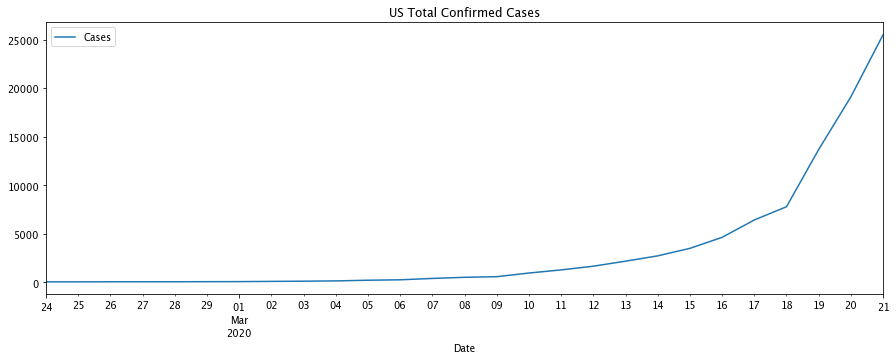

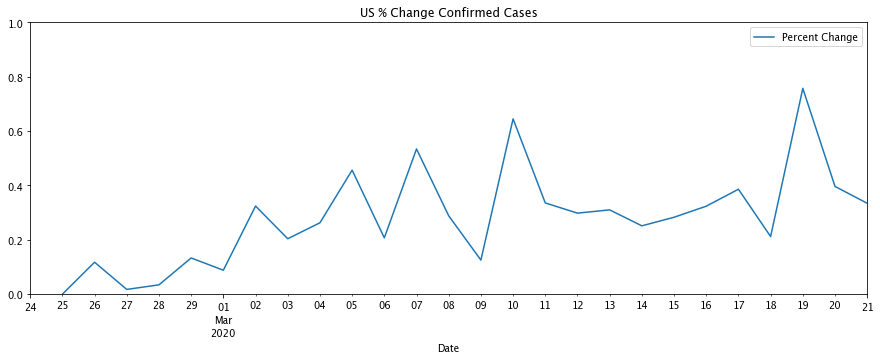

In [25]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases')
plt.show()
df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='US % Change Confirmed Cases', ylim=(0,1.0)); 


#### US Polyfit,  Median Filter,  % Change, Testing

US Testing data

In [26]:
df_state_raw = pd.read_csv('/Users/jayurbain/Dropbox/covid19_jay/covid19/data/us-daily.csv')
df_us_testing=df_state_raw.set_index(['date'])
df_us_testing

,states,positive,negative,posNeg,pending,death,total
date,,,,,,,
20200304,14,118,748,866,103,NaN,969
20200305,24,176,971,1147,197,NaN,1344
20200306,36,223,1617,1840,458,NaN,2298
20200307,51,341,1863,2204,602,NaN,2806
20200308,51,417,2437,2854,347,NaN,3201
20200309,51,584,3500,4084,313,NaN,4397
20200310,51,778,3807,4585,469,NaN,4889
20200311,51,1053,5978,7031,563,27.0,7617
20200312,51,1315,7950,9265,673,36.0,9873


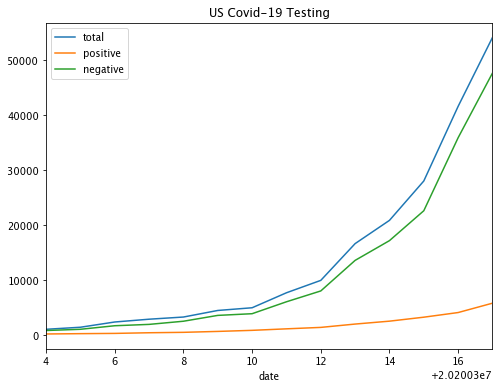

In [27]:
df_us_testing[['total','positive','negative']].plot(figsize=(8,6), title='US Covid-19 Testing');

In [28]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 8.87846965e-06, -3.96289782e-04,  4.19118262e-03,  2.19644869e-02,
       -2.78981241e-02])

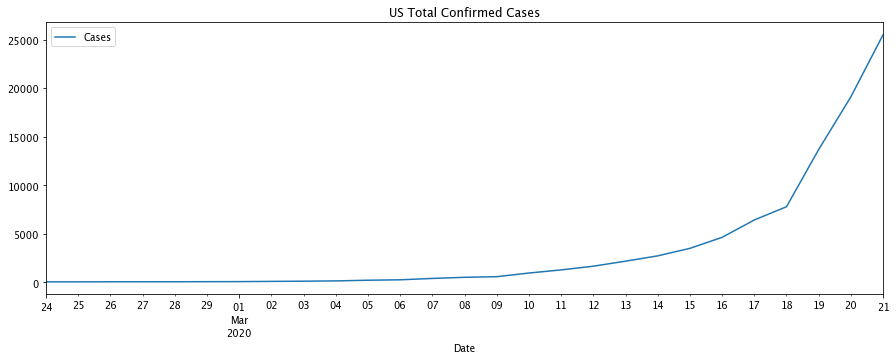

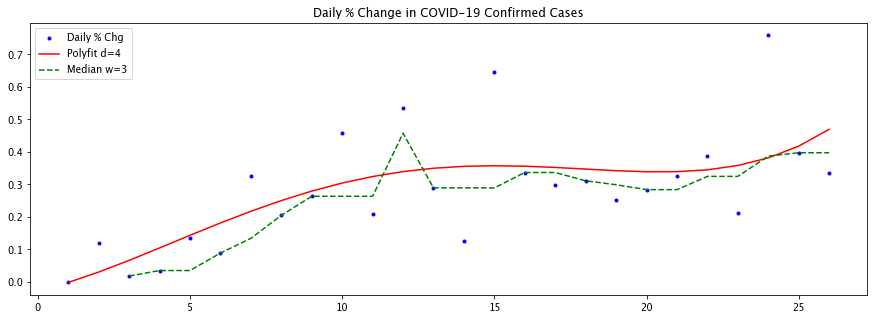

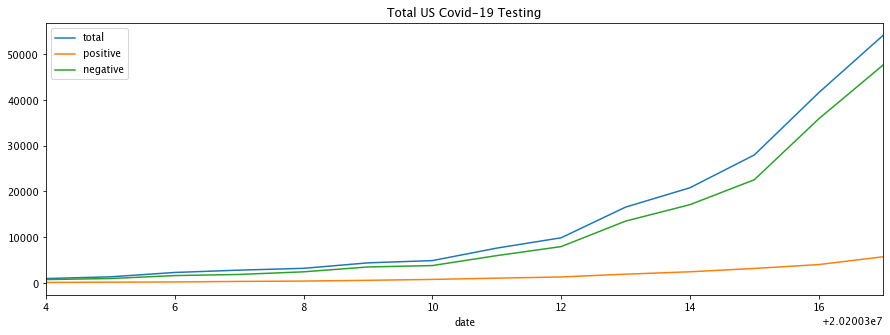

In [29]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
ax.set_title('Daily % Change in COVID-19 Confirmed Cases')
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
leg = ax.legend(loc='upper left', frameon=True);
plt.show()

df_us_testing[['total','positive','negative']].plot(title='Total US Covid-19 Testing');


#### China Confirmed Cases

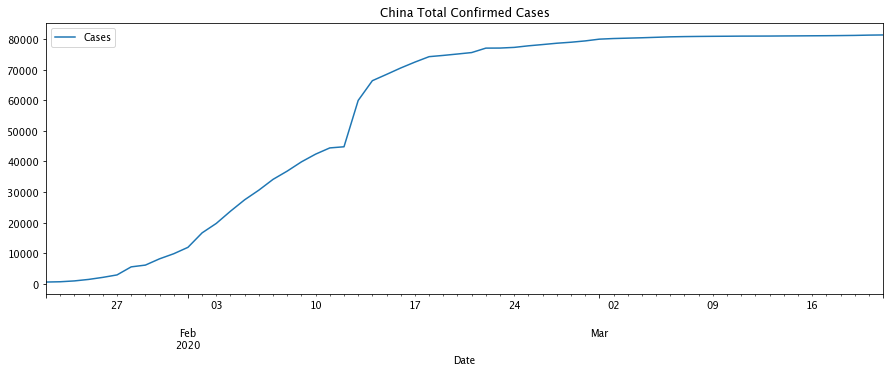

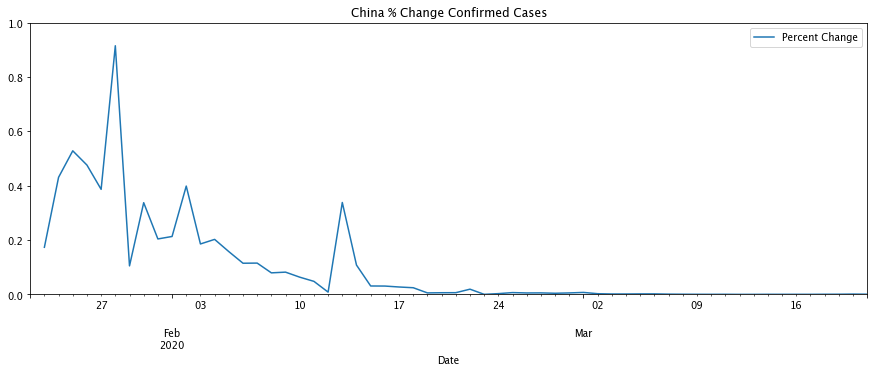

In [30]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='China Total Confirmed Cases')

plt.show()

df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='China % Change Confirmed Cases', ylim=(0,1.0)); 


#### China Polyfit and Median Filter % Change

In [31]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([-2.51097094e-07,  2.63559963e-05, -5.57975507e-04, -1.56462382e-02,
        4.68054972e-01])

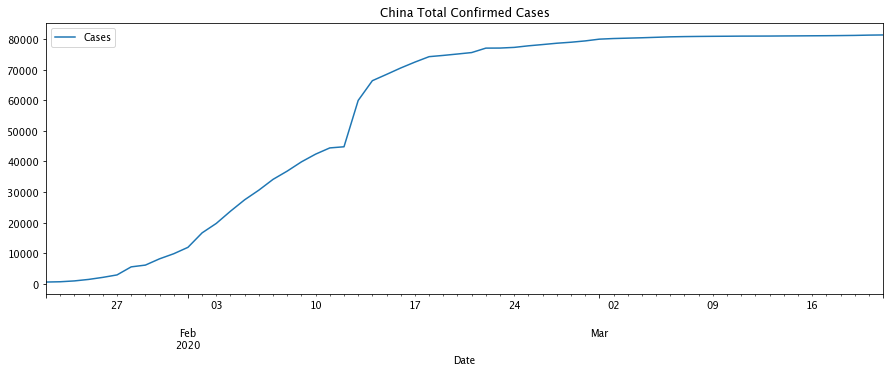

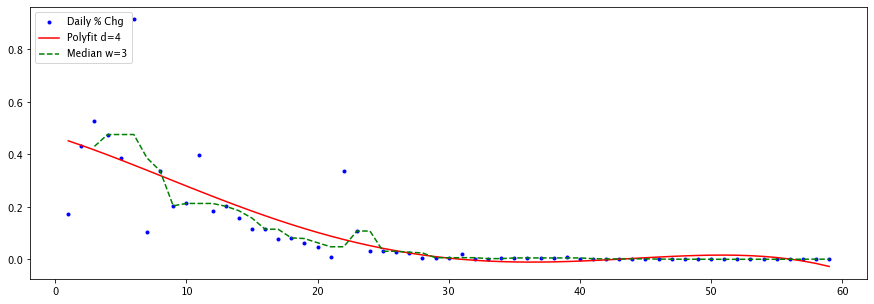

In [32]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='China Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper left', frameon=True);

#### South Korea Confirmed Cases

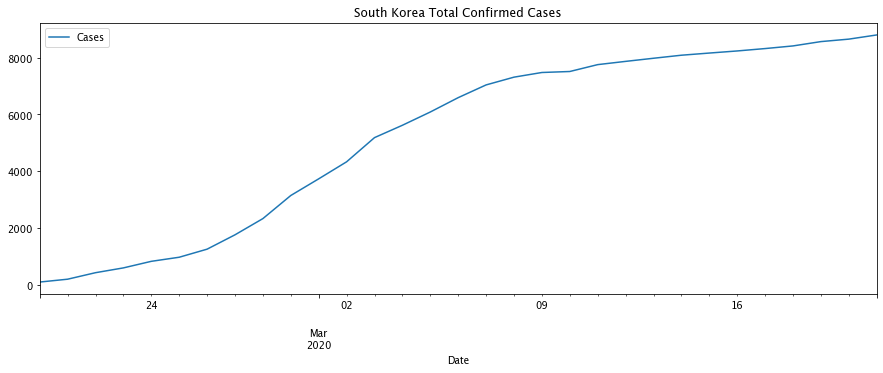

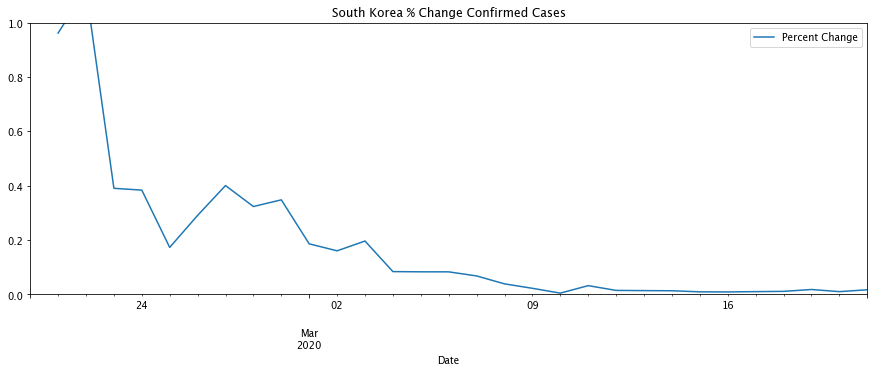

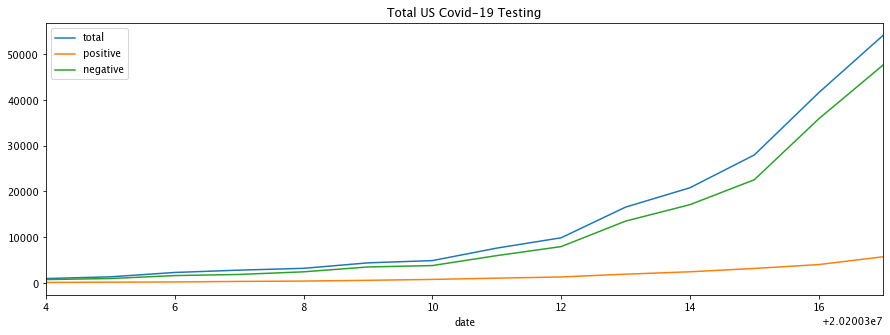

In [33]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

plt.show()

df_country['Cases'].pct_change().to_frame('Percent Change').plot(title='South Korea % Change Confirmed Cases', ylim=(0,1.0)); 

df_us_testing[['total','positive','negative']].plot(title='Total US Covid-19 Testing');

#### South Korea Polyfit and Median Filter % Change

Load South Korea test data

In [34]:
df_south_korea_testing_raw = pd.read_csv('/Users/jayurbain/Dropbox/covid19_jay/covid19/data/Korea_Daily_Numbers_Jay.csv')
df_south_korea_testing=df_south_korea_testing_raw.set_index(['Date'])
df_south_korea_testing = pd.DataFrame(df_south_korea_testing['Total Tests'], columns=['Total Tests'])
df_south_korea_testing


,Total Tests
Date,
2020-02-05,714
2020-02-06,885
2020-02-07,1130
2020-02-08,1352
2020-02-09,2097
2020-02-10,2598
2020-02-11,3110
2020-02-12,4325
2020-02-13,5624


In [35]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]

df = df_country['Cases'].to_frame('Cases').reset_index()[1:]
df
x = df.index
y = df['Cases']
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 9.35579590e-02, -6.30161085e+00,  1.28974301e+02, -4.49856574e+02,
        7.39217163e+02])

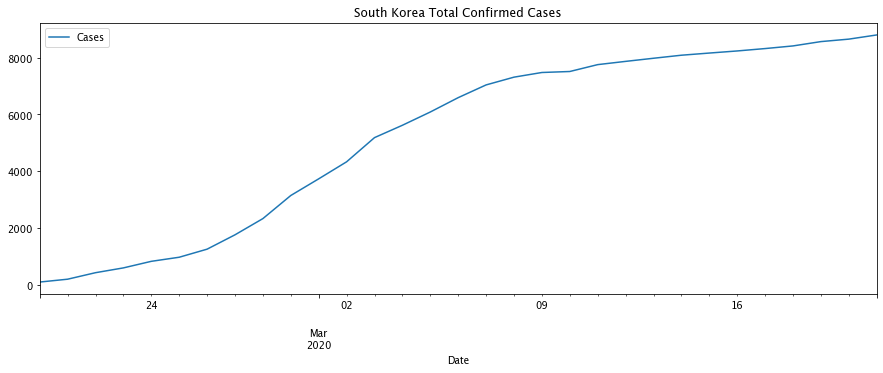

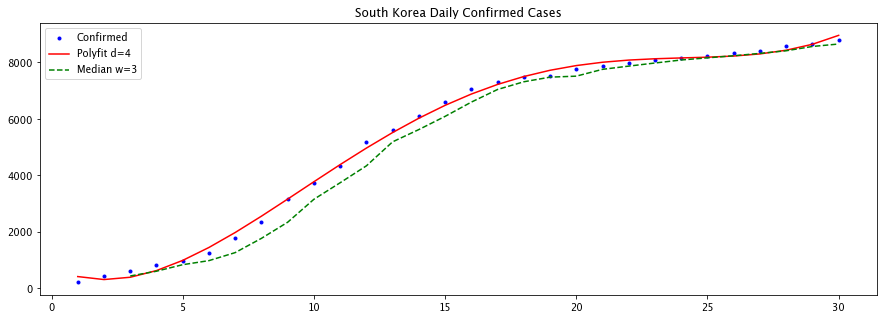

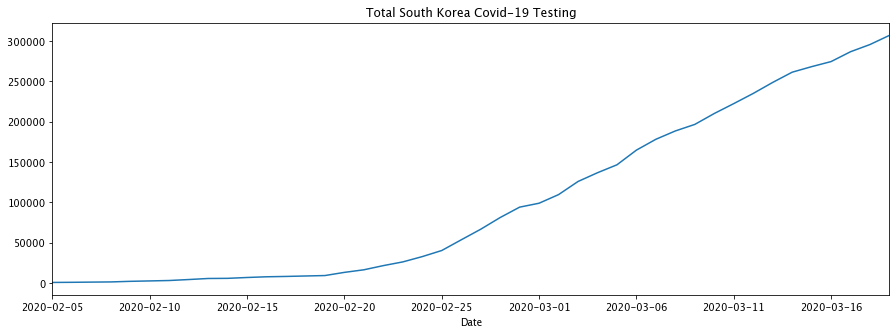

In [36]:
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
plt.title('South Korea Daily Confirmed Cases')
ax.plot(x, y, '.b', label='Confirmed')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper left', frameon=True)
plt.show()

df_south_korea_testing['Total Tests'].plot(title='Total South Korea Covid-19 Testing');

In [37]:
df = df_country['Cases'].pct_change().to_frame('Percent Change').reset_index()[1:]
df
x = df.index
y = df['Percent Change']
# print(x, y)
z = np.polyfit(x, y, 4)
p = np.poly1d(z)
p

poly1d([ 1.11489488e-05, -7.97068508e-04,  2.06568814e-02, -2.40951765e-01,
        1.19191566e+00])

,Total Tests
Date,
2020-02-05,714
2020-02-06,885
2020-02-07,1130
2020-02-08,1352
2020-02-09,2097
2020-02-10,2598
2020-02-11,3110
2020-02-12,4325
2020-02-13,5624


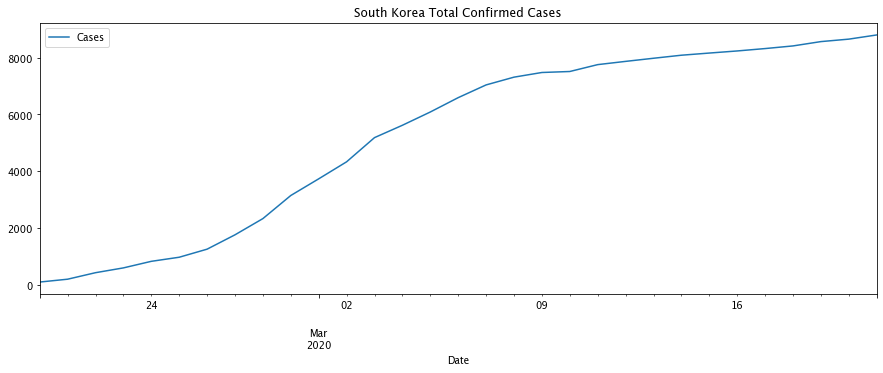

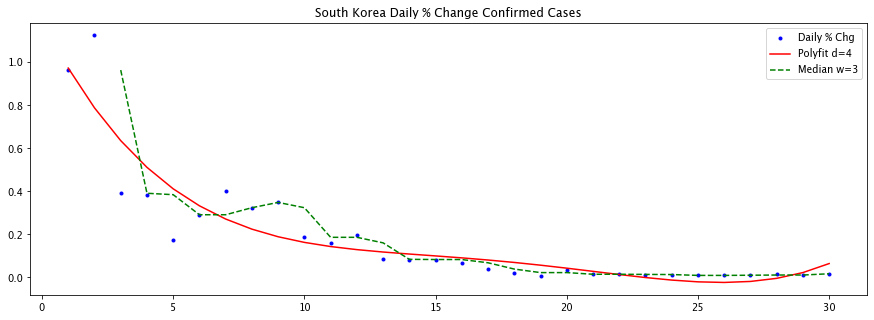

In [38]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='South Korea Total Confirmed Cases')

ma = y.rolling(window=3).median()
fig, ax = plt.subplots()
plt.title('South Korea Daily % Change Confirmed Cases')
ax.plot(x, y, '.b', label='Daily % Chg')
ax.plot(x, p(x), '-r', label='Polyfit d=4')
ax.plot(x, ma, '--g', label='Median w=3')
# ax.axis('equal')
leg = ax.legend(loc='upper right', frameon=True);

df_south_korea_testing

#### Plots of Confirmed Cases, Deaths, and Recovered COVID-19 Patients

US and Eurpean like countries

In [39]:
%matplotlib inline

def plot_countries(df, countries, min_cases=50, ls='-', col='Cases'):
    for country in countries:
        df_country = df.loc[(df['Country/Region'] == country) & (df['Cases'] >= min_cases)]
        if len(df_country) == 0:
            continue
        df_country.reset_index()[col].plot(label=country, ls=ls)

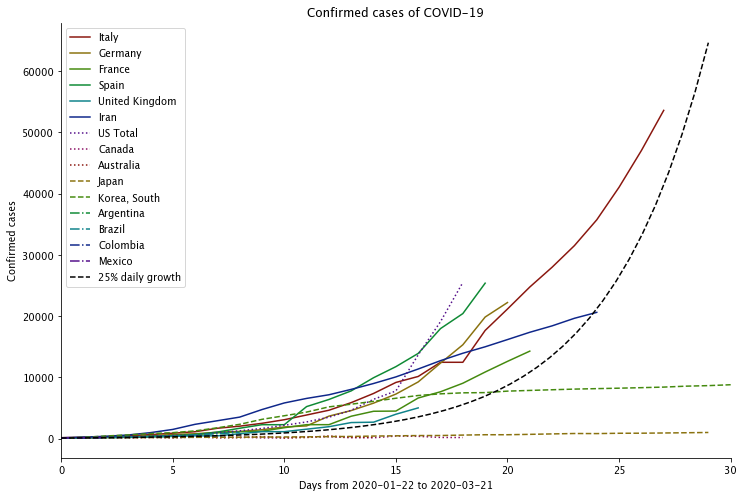

In [40]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=100
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_confirmed, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.25) ** x, ls='--', color='k', label='25% daily growth')

ax.set(title='Confirmed cases of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

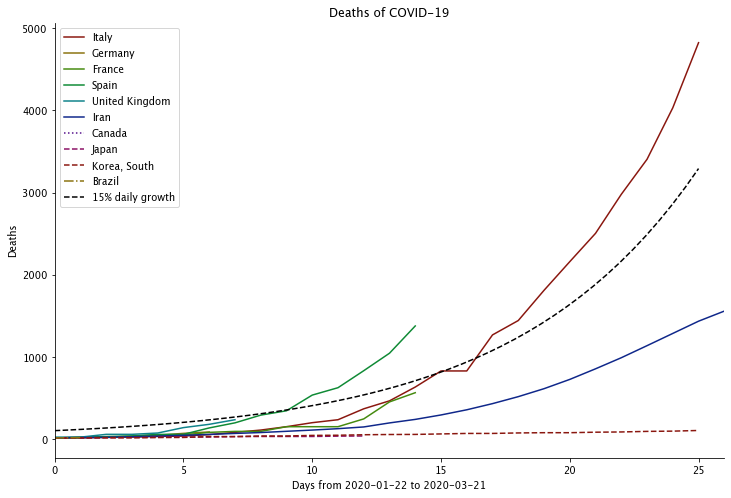

In [41]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=10
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_deaths, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.15) ** x, ls='--', color='k', label='15% daily growth')

ax.set(title='Deaths of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Deaths')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

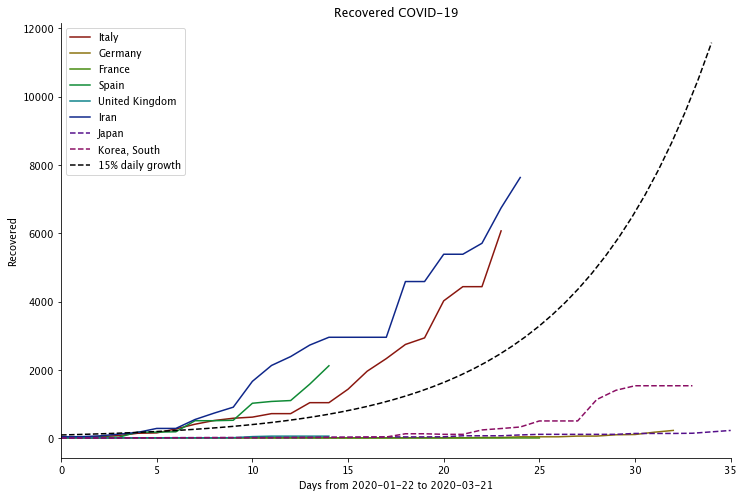

In [42]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=10
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_recovered, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.15) ** x, ls='--', color='k', label='15% daily growth')

ax.set(title='Recovered COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Recovered')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

#### Population Stats for Normalization

https://www.macrotrends.net/countries/ranking/population 

In [43]:
pop_dict = {'US Total':331002651,
    'Japan':126476461,
    'Germany':83783942,
    'United Kingdom':67886011,
    'France':6273511,
    'Italy':60461826,
    'Korea, South':51269185,
    'Spain':46754778,
    'Argentina':45195774,
    'Canada':37742154,
    'Australia':25499884,
    'Taiwan':23816775,
    'Iran':8992949,
    'Brazil':209469333,
    'Colombia':49648685,
    'Mexico':126190788
}

In [44]:
pop_dict['US Total']

331002651

#### Plot by normaling cases by population per 1M people

In [45]:
%matplotlib inline

def plot_countries_norm(df, countries, min_cases=50, ls='-', col='Cases'):
    for country in countries:
        df_country = df.loc[(df['Country/Region'] == country) & (df['Cases'] >= min_cases)].copy(deep=True)
        df_country['Cases']=df_country['Cases']*1000000/pop_dict[country]
        if len(df_country) == 0:
            continue
        df_country.reset_index()[col].plot(label=country, ls=ls)
#         df_country.plot(y='Cases', label=country, ls=ls)

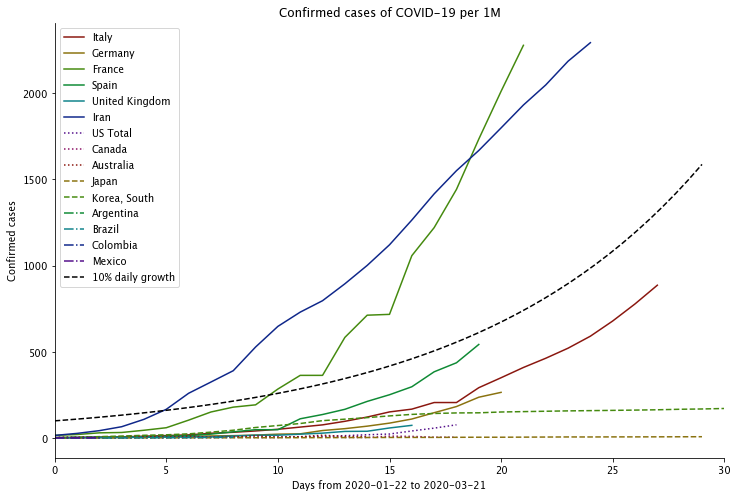

In [46]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=100
for countries, ls in zip(country_groups, line_styles):
    plot_countries_norm(df_confirmed, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.10) ** x, ls='--', color='k', label='10% daily growth')

ax.set(title='Confirmed cases of COVID-19 per 1M',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

#### US Confirmed COVID-19 Cases and SPY Index

In [47]:
#!pip install yfinance

[*********************100%***********************]  1 of 1 completed


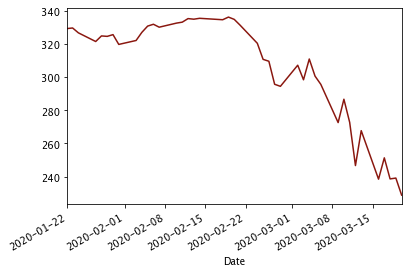

In [48]:
%matplotlib inline
# Import the yfinance. 
import yfinance as yf

# Get the data for the stock AAPL
data = yf.download('SPY', min_date_string, max_date_string)

# Import the plotting library
import matplotlib.pyplot as plt


# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

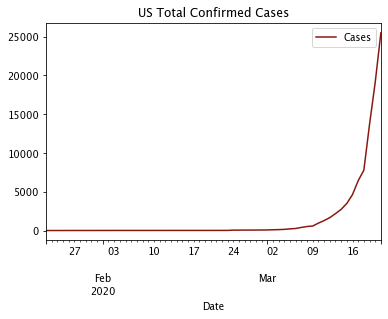

In [49]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') ]
df_country.plot(y='Cases', title='US Total Confirmed Cases');

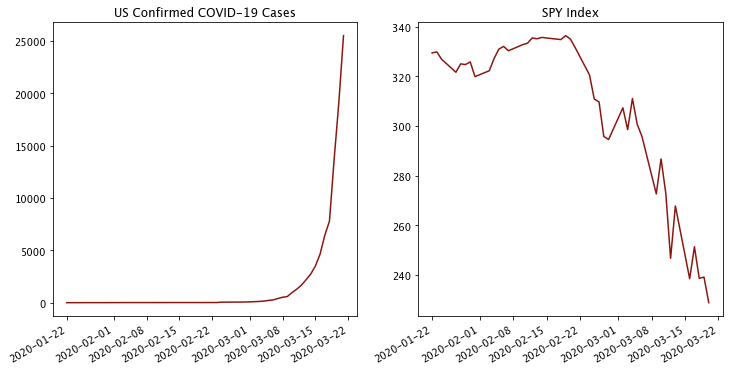

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.autofmt_xdate()
ax[0].title.set_text('US Confirmed COVID-19 Cases')
ax[0].plot(df_country.index, df_country['Cases'], label='US Cases')
ax[0].xaxis_date()
ax[1].plot(data.index, data['Adj Close'], label='SPY')
ax[1].title.set_text('SPY Index')
ax[1].xaxis_date()
plt.show();

In [60]:
df_china_hubei = df_confirmed.loc[(df_confirmed['Country/Region'] == 'China') & (df_confirmed['Province/State'] == 'Hubei') ]


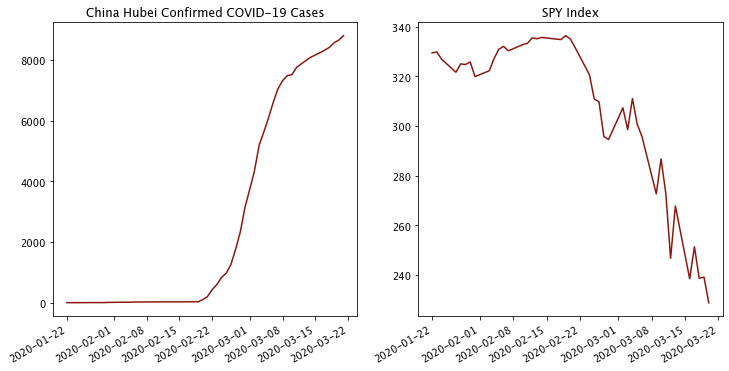

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.autofmt_xdate()
ax[0].title.set_text('China Hubei Confirmed COVID-19 Cases')
ax[0].plot(df_china_hubei.index, df_country['Cases'], label='US Cases')
ax[0].xaxis_date()
ax[1].plot(data.index, data['Adj Close'], label='SPY')
ax[1].title.set_text('SPY Index')
ax[1].xaxis_date()
plt.show();

The stock market collapsed way before the COVID-19 confirmed cases. So we can't use COVID-19 to predict the market, but we may be able to use the market to predict COVID-19.

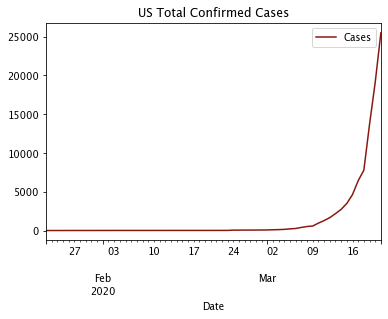

In [51]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') ]
df_country.plot(y='Cases', title='US Total Confirmed Cases');

#### South Korea Confirmed and Recovered COVID-19 Cases

Korea has used aggressive testing

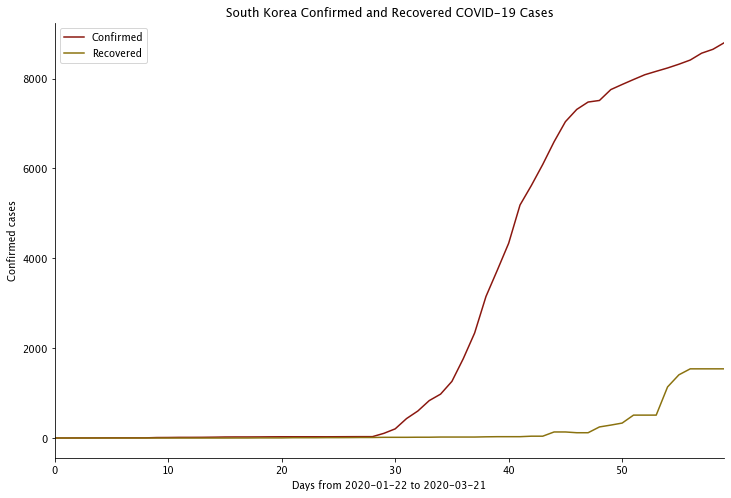

In [52]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') ]
df_country.reset_index()['Cases'].plot(label='Confirmed')
df_country = df_recovered.loc[(df_recovered['Country/Region'] == 'Korea, South') ]
df_country.reset_index()['Cases'].plot(label='Recovered')

ax.set(title='South Korea Confirmed and Recovered COVID-19 Cases',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();



#### Italy Confirmed and Recovered COVID-19 Cases

Italy appears behind the curve

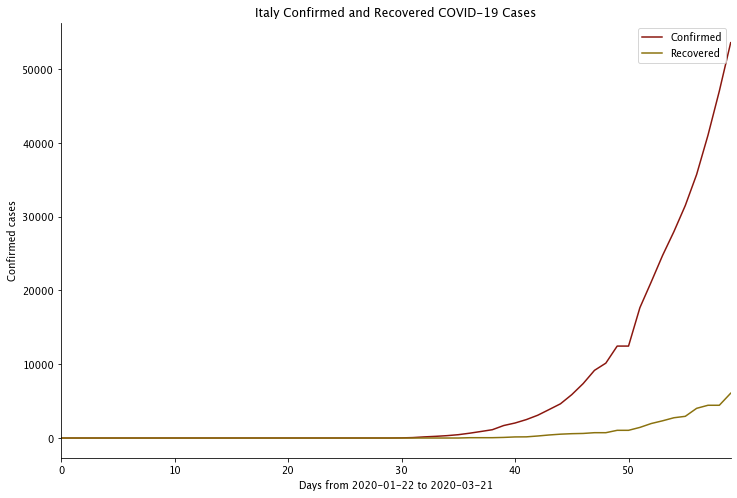

In [53]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Italy') ]
df_country.reset_index()['Cases'].plot(label='Confirmed')
df_country = df_recovered.loc[(df_recovered['Country/Region'] == 'Italy') ]
df_country.reset_index()['Cases'].plot(label='Recovered')

ax.set(title='Italy Confirmed and Recovered COVID-19 Cases',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

#### Curve Fitting

[   4.82349109 -107.20889743  250.12398202]
[2.68876314e+00 5.36424670e-10 3.21855196e-10]


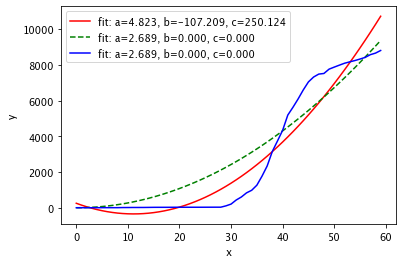

In [54]:
from scipy.optimize import curve_fit
import math

def func(x, a, b, c):
    return a*x**2 + b*x + c

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') ].copy(deep=True)
df_country = df_country.reset_index()
ydata = df_country['Cases']
xdata = df_country.index

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.plot(xdata, ydata, 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show();

In [55]:
# 'http://covidtracking.com/api/states/daily.csv'


df_state_raw = pd.read_csv('/Users/jayurbain/Dropbox/covid19_jay/covid19/data/states-daily.csv')
df_state_raw

,date,state,positive,negative,pending,death,total,dateChecked
0,20200317,AK,3.0,334.0,NaN,NaN,337.0,2020-03-17T20:00:00Z
1,20200317,AL,36.0,28.0,NaN,0.0,64.0,2020-03-17T20:00:00Z
2,20200317,AR,22.0,197.0,41.0,NaN,260.0,2020-03-17T20:00:00Z
3,20200317,AZ,20.0,142.0,66.0,0.0,228.0,2020-03-17T20:00:00Z
4,20200317,CA,483.0,7981.0,NaN,11.0,8407.0,2020-03-17T20:00:00Z
...,...,...,...,...,...,...,...,...
640,20200304,OR,3.0,29.0,18.0,NaN,50.0,2020-03-04T21:00:00Z
641,20200304,SC,0.0,5.0,0.0,NaN,5.0,2020-03-04T21:00:00Z
642,20200304,TX,1.0,NaN,NaN,NaN,1.0,2020-03-04T21:00:00Z
643,20200304,WA,39.0,NaN,NaN,NaN,39.0,2020-03-04T21:00:00Z


In [56]:
df_state_raw = pd.read_csv('/Users/jayurbain/Dropbox/covid19_jay/covid19/data/us-daily.csv')
df_state_raw

,date,states,positive,negative,posNeg,pending,death,total
0,20200304,14,118,748,866,103,NaN,969
1,20200305,24,176,971,1147,197,NaN,1344
2,20200306,36,223,1617,1840,458,NaN,2298
3,20200307,51,341,1863,2204,602,NaN,2806
4,20200308,51,417,2437,2854,347,NaN,3201
5,20200309,51,584,3500,4084,313,NaN,4397
6,20200310,51,778,3807,4585,469,NaN,4889
7,20200311,51,1053,5978,7031,563,27.0,7617
8,20200312,51,1315,7950,9265,673,36.0,9873
9,20200313,51,1922,13513,15435,1130,39.0,16565


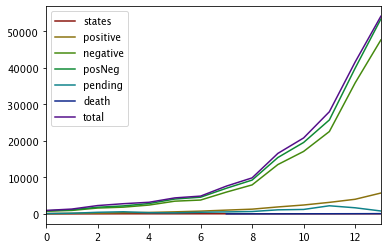

In [57]:
df_state_raw[['states','positive','negative','posNeg','pending','death','total']].plot()

In [58]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)

In [59]:
measurements = [[1,0], [0,0], [0,1]]
kf.em(measurements).smooth([[2,0], [2,1], [2,2]])[0]
# array([[ 0.85819709],
#        [ 1.77811829],
#        [ 2.19537816]])

array([[0.85819709],
       [1.77811829],
       [2.19537816]])